In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pathlib
import os
import random
import pickle


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def para_load(num):
    folder_path = pathlib.Path("{}_view_mat".format(dataset_name))
    file_path = os.path.join(folder_path, str(num)+".csv")
    
    Rt = np.loadtxt(file_path, delimiter=",")
    Rt = np.linalg.inv(Rt)
    cam_world_cood = -np.dot(Rt[0:3,0:3].T, Rt[0:3,3])
    return cam_world_cood

In [3]:
dataset_name = "kannyou"

In [4]:
with open("{}_id.pickle".format(dataset_name), 'rb') as f:
    ids = pickle.load(f)

new_ids = []
slected = []
for _id in ids:
    column = int(_id[1].split("_")[1])
    if column%2:
        new_ids.append(_id)
        slected.append(_id[0])
slected = np.array(slected)
print(len(new_ids))

FileNotFoundError: [Errno 2] No such file or directory: 'kannyou_id.pickle'

In [ ]:
np.save('{}_camera_select'.format(dataset_name), slected)

In [ ]:
x_list, y_list, z_list = [],[],[]

for new_id in new_ids:
    co = para_load(new_id[0])
    x_list.append(co[0])
    y_list.append(co[1])
    z_list.append(co[2])

In [5]:
x_list, y_list, z_list = [],[],[]

for new_id in range(120):
    co = para_load(new_id)
    x_list.append(co[0])
    y_list.append(co[1])
    z_list.append(co[2])

<IPython.core.display.Javascript object>


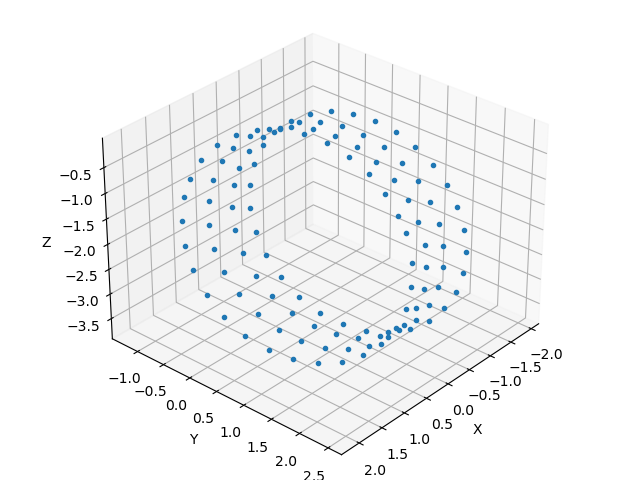

C:\Users\murata\anaconda3\envs\py37cv\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


In [6]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.plot(x_list,y_list,z_list,marker=".",linestyle='None')

plt.show()

In [7]:
z_list

[-0.04924468686897507,
 -0.018179828392636026,
 -0.0470958817353617,
 -0.1353761389995422,
 -0.2762877271586547,
 -0.463823382585024,
 -0.6947073827375166,
 -0.9523275500170398,
 -1.231716655987284,
 -1.51681528300589,
 -1.7927014383896025,
 -2.0522358068060162,
 -2.27869804385111,
 -2.464830390408532,
 -2.604859383737171,
 -2.6916510217243688,
 -2.7179438606014674,
 -2.6845697491535905,
 -2.5915519903877176,
 -2.4462979268581484,
 -2.252749572769609,
 -2.022653550967705,
 -1.7631278587749204,
 -1.4812414704386034,
 -1.1974156513236187,
 -0.9195621875677371,
 -0.6624175500404267,
 -0.43866156433794123,
 -0.255385151606942,
 -0.11907060329966848,
 -0.5605423421747333,
 -0.44033313142785196,
 -0.37460227481984254,
 -0.36933181863329445,
 -0.4203455952975561,
 -0.5285739964142669,
 -0.6889675338117868,
 -0.8917989991566486,
 -1.1330384104600943,
 -1.3988825869389112,
 -1.675458119395051,
 -1.9549005139592914,
 -2.220318072857595,
 -2.4610633422754886,
 -2.672689678502229,
 -2.841523753168